Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft resumes,anubhav kumar singh core competencies scriptin...
1,PeopleSoft resumes,classification internal classification interna...
2,PeopleSoft resumes,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft resumes,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft resumes,peoplesoft administration vivekanand sayana ca...


# Data Preprocessing
## Label Encoder

In [3]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LabelEncoding"]=Encoder.fit_transform(resume_data ["Category"])
resume_data

,Category,Resume_Details,LabelEncoding
0,PeopleSoft resumes,anubhav kumar singh core competencies scriptin...,0
1,PeopleSoft resumes,classification internal classification interna...,0
2,PeopleSoft resumes,sirazuddin bangalore india sirazuddin bangalor...,0
3,PeopleSoft resumes,peoplesoft admin varkala vikas career objectiv...,0
4,PeopleSoft resumes,peoplesoft administration vivekanand sayana ca...,0
5,PeopleSoft resumes,hari narayana professional summary years exper...,0
6,PeopleSoft resumes,murali professional summary years experience p...,0
7,PeopleSoft resumes,priyabrata hota career objective pursuing peop...,0
8,PeopleSoft resumes,tanna sujatha objective seeking challenging ro...,0
9,PeopleSoft resumes,address manyata tech park nagavara bangalore l...,0


In [4]:
resume_data.describe()

,LabelEncoding
count,52.000000
mean,1.442308
std,1.036840
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [5]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LabelEncoding     0
dtype: int64

# Model Building
## Train - Test Split

In [6]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((39,), (13,))

TF-IDF Vectorization

In [8]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [9]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [10]:
x_train.shape, x_test.shape

((39, 2721), (13, 2721))

In [11]:
print(y_train),print(y_test)

['React JS Developer' 'Workday' 'SQL Developer' 'PeopleSoft resumes'
 'React JS Developer' 'PeopleSoft resumes' 'SQL Developer'
 'PeopleSoft resumes' 'React JS Developer' 'PeopleSoft resumes'
 'React JS Developer' 'PeopleSoft resumes' 'React JS Developer'
 'React JS Developer' 'Workday' 'SQL Developer' 'SQL Developer'
 'React JS Developer' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft resumes' 'React JS Developer'
 'React JS Developer' 'PeopleSoft resumes' 'SQL Developer' 'SQL Developer'
 'Workday' 'Workday' 'Workday' 'SQL Developer' 'React JS Developer'
 'Workday' 'PeopleSoft resumes' 'Workday' 'React JS Developer'
 'React JS Developer' 'Workday' 'SQL Developer']
['PeopleSoft resumes' 'React JS Developer' 'PeopleSoft resumes' 'Workday'
 'React JS Developer' 'SQL Developer' 'React JS Developer' 'Workday'
 'SQL Developer' 'Workday' 'React JS Developer' 'React JS Developer'
 'SQL Developer']


(None, None)

Classification Models

KNN-Classifier

In [12]:
model_knn = KNeighborsClassifier(n_neighbors=31)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.54
Accuracy of  test set    : 0.54
Classification report for classifier KNeighborsClassifier(n_neighbors=31):
                    precision    recall  f1-score   support

PeopleSoft resumes       0.40      1.00      0.57         2
React JS Developer       0.62      1.00      0.77         5
     SQL Developer       0.00      0.00      0.00         3
           Workday       0.00      0.00      0.00         3

          accuracy                           0.54        13
         macro avg       0.26      0.50      0.34        13
      weighted avg       0.30      0.54      0.38        13




Decision Tree Classifier

In [13]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.77
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

PeopleSoft resumes       0.33      0.50      0.40         2
React JS Developer       1.00      0.80      0.89         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       0.67      0.67      0.67         3

          accuracy                           0.77        13
         macro avg       0.75      0.74      0.74        13
      weighted avg       0.82      0.77      0.79        13




Random Forest-Classifier

In [14]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




Support Vectore Machine (SVM) Classifier

In [15]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier SVC():
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         3

          accuracy                           0.92        13
         macro avg       0.96      0.92      0.93        13
      weighted avg       0.94      0.92      0.92        13




Logistic Regression

In [16]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




 Bagging Classifier

In [17]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.95
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




AdaBoost Classifier

In [18]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




Gradient Boosting Classifier

In [19]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




Naive Bayes Classifier

In [20]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

PeopleSoft resumes       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




# Model Evaluation

In [21]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.538462,0.54,0.26,0.50,0.34
1,DecisionTree Classifier,1.000000,0.77,0.75,0.74,0.74
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,0.92,0.96,0.92,0.93
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.948718,1.00,1.00,1.00,1.00
6,AdaBoost Classifier,1.000000,1.00,1.00,1.00,1.00
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [22]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

Train and Test Accuracy Plot

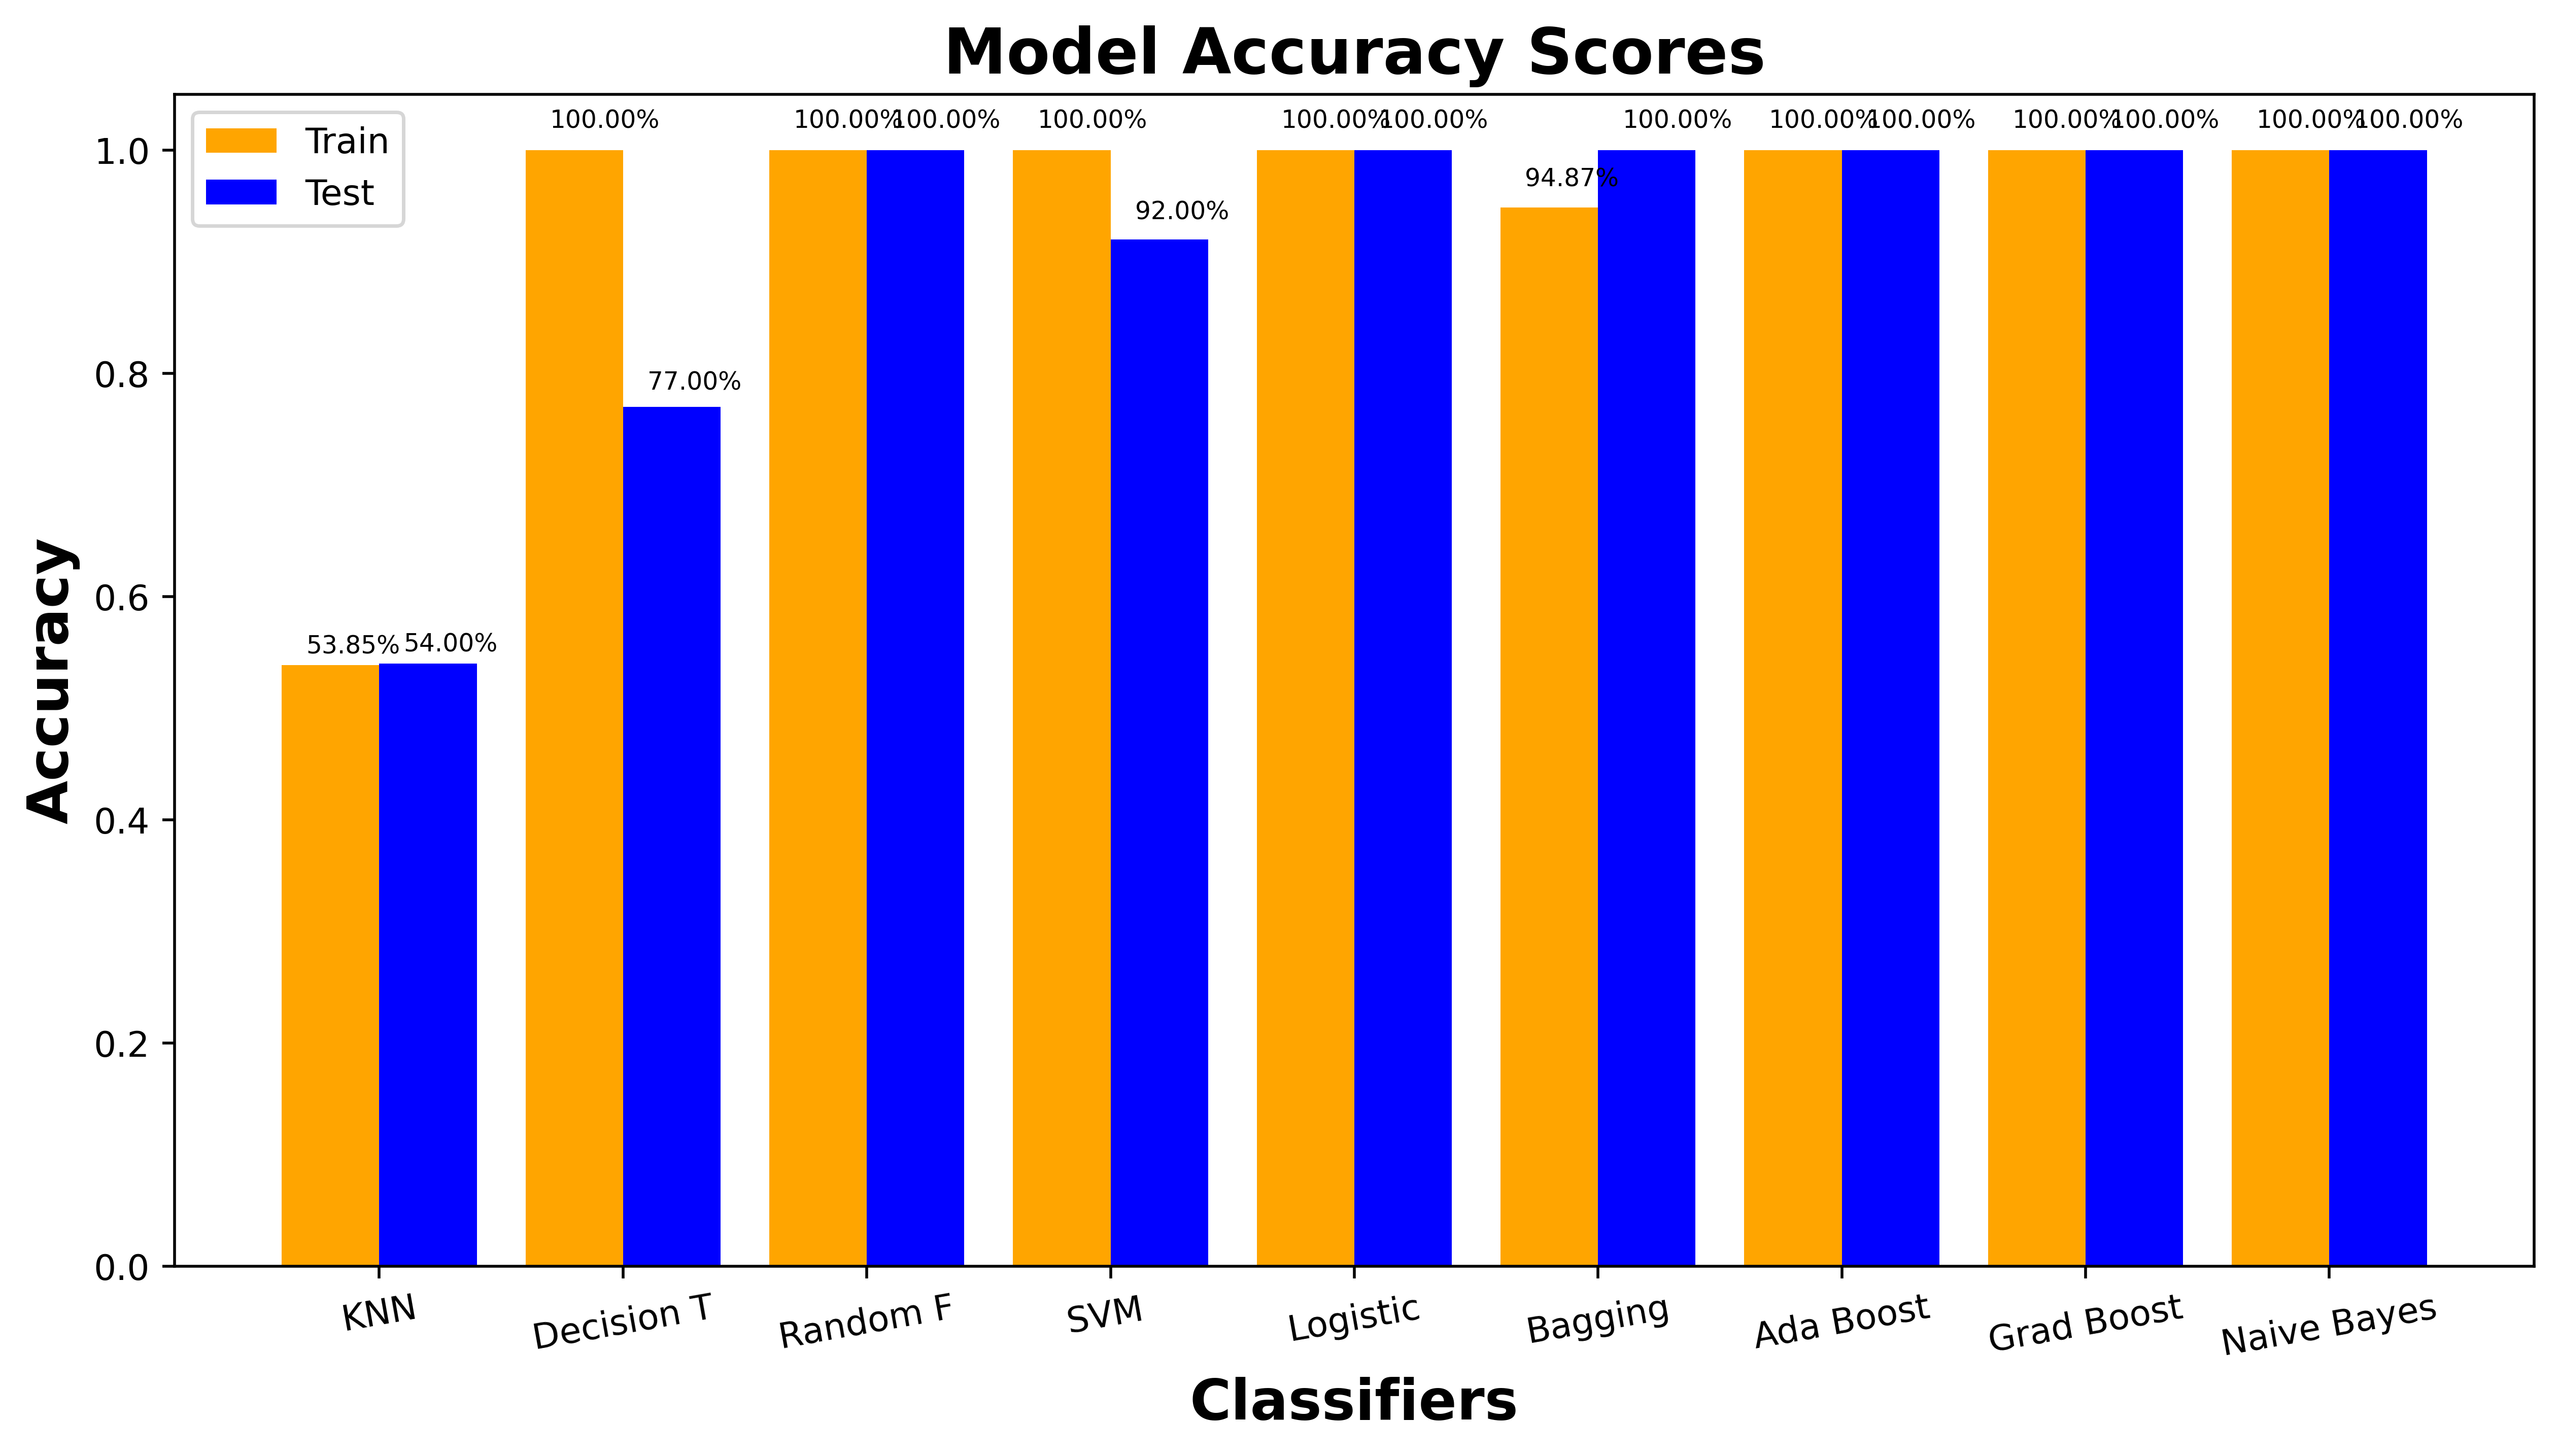

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]
bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)
plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()
for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)
pylab.rcParams.update(rcParams)
plt.show()